In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
from textblob import TextBlob

In [3]:
headlines = pd.read_csv('abcnews-date-text.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [5]:
headlinesSample = headlines.sample(10000, random_state = 123)
headlinesSample.reset_index(inplace = True)

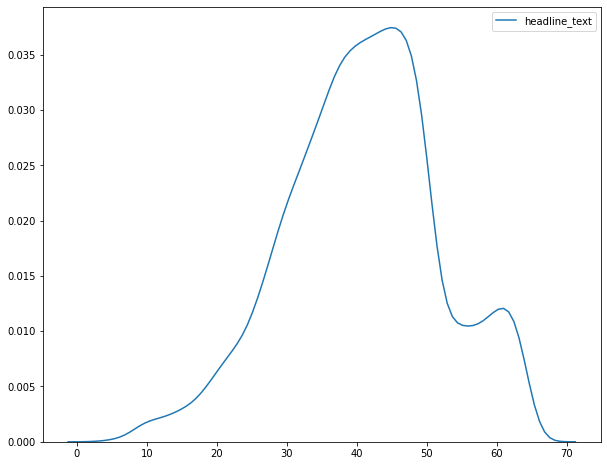

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
ax = sns.kdeplot(headlinesSample['headline_text'].map(lambda x: len(x)))

In [7]:
headlinesSample['textLenght'] = headlinesSample['headline_text'].map(lambda x: len(x))

In [8]:
# Creación de nuevos features a partir de PoS: Presencia de cada una de las partes
def wilsonScore(num, den):
    if num == 0:
        return round(0, 2)
    phat = num/den
    z = 1.96
    return round(((phat + z*z/(2*den) - z * np.sqrt((phat*(1-phat)+z*z/(4*den))/den))/(1+z*z/den)), 2)

def posPreprocessing(text):
    tagsCount = {'ADJ':0, 'ADP':0, 'ADV':0, 'CONJ':0, 'DET':0, 'NOUN':0, 'NUM':0, 'PRT':0, 'PRON':0, 'VERB':0, '.':0, 'X':0}
    tags = []
    sentences = sent_tokenize(text)
    for sentence in sentences:
        tags += nltk.pos_tag(word_tokenize(sentence), tagset = 'universal')
    for word, tag in tags:
        tagsCount[tag] += 1    
    POS_ratio = [round((12 - list(tagsCount.values()).count(0))/12, 2)]
    mostCommonPOS_ratio = [round(list(tagsCount.values()).count(max(tagsCount.values()))/(12-list(tagsCount.values()).count(0)), 2)]    
    #noun_ratio =  [round(tagsCount['NOUN']/sum(tagsCount.values()), 2)]
    noun_ratio =  [wilsonScore(tagsCount['NOUN'], sum(tagsCount.values()))]
    return list(tagsCount.values()) + POS_ratio + mostCommonPOS_ratio + noun_ratio
        
headlinesSample[['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X','POS_ratio','topPOS_ratio','NOUN/TOT']] = pd.DataFrame(headlinesSample['headline_text'].map(lambda x: posPreprocessing(x)).tolist())

In [9]:
def sentimentAnalysis(text):
    blob = TextBlob(text)
    return blob.sentiment

headlinesSample[['polarity', 'subjectivity']] = pd.DataFrame(headlinesSample['headline_text'].map(lambda x: sentimentAnalysis(x)).tolist())
round(headlinesSample[['polarity', 'subjectivity']].mean(), 2)

polarity        0.02
subjectivity    0.15
dtype: float64

In [10]:
headlinesSample.head(5)

,index,publish_date,headline_text,textLenght,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.,X,POS_ratio,topPOS_ratio,NOUN/TOT,polarity,subjectivity
0,408956,20080905,rees sworn in as new nsw premier,32,1,2,0,0,0,3,0,0,0,1,0,0,0.33,0.25,0.16,0.136364,0.454545
1,826060,20131014,nrn new bjd case,16,1,0,1,0,0,2,0,0,0,0,0,0,0.25,0.33,0.15,0.136364,0.454545
2,819895,20130917,natasha griggs defends male dominated federal cabinet,53,2,0,1,0,0,3,0,0,0,1,0,0,0.33,0.25,0.16,0.000000,0.100000
3,685056,20120404,horsham records road toll spike,31,0,0,0,0,0,5,0,0,0,0,0,0,0.08,1.00,0.57,0.000000,0.000000
4,387780,20080603,corbell warns canberrans of house fire risk,43,0,1,0,0,0,6,0,0,0,0,0,0,0.17,0.50,0.49,0.000000,0.000000


In [11]:
ref = round(headlinesSample[['textLenght','ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X','POS_ratio','topPOS_ratio','NOUN/TOT', 'polarity', 'subjectivity']].mean(), 2)
ref

textLenght      40.76
ADJ              0.77
ADP              0.64
ADV              0.13
CONJ             0.03
DET              0.10
NOUN             3.36
NUM              0.11
PRT              0.25
PRON             0.05
VERB             1.08
.                0.01
X                0.00
POS_ratio        0.29
topPOS_ratio     0.38
NOUN/TOT         0.22
polarity         0.02
subjectivity     0.15
dtype: float64

In [12]:
ref.to_frame().unstack().unstack().loc[0]

textLenght      40.76
ADJ              0.77
ADP              0.64
ADV              0.13
CONJ             0.03
DET              0.10
NOUN             3.36
NUM              0.11
PRT              0.25
PRON             0.05
VERB             1.08
.                0.01
X                0.00
POS_ratio        0.29
topPOS_ratio     0.38
NOUN/TOT         0.22
polarity         0.02
subjectivity     0.15
Name: 0, dtype: float64

In [15]:
i = headlinesSample.loc[5, ['textLenght','ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X','POS_ratio','topPOS_ratio','NOUN/TOT', 'polarity', 'subjectivity']]
i

textLenght        45
ADJ                1
ADP                2
ADV                0
CONJ               0
DET                0
NOUN               4
NUM                0
PRT                0
PRON               0
VERB               1
.                  0
X                  0
POS_ratio       0.33
topPOS_ratio    0.25
NOUN/TOT        0.22
polarity         0.5
subjectivity     0.5
Name: 5, dtype: object

In [16]:
ref - i

textLenght     -4.24
ADJ            -0.23
ADP            -1.36
ADV             0.13
CONJ            0.03
DET              0.1
NOUN           -0.64
NUM             0.11
PRT             0.25
PRON            0.05
VERB            0.08
.               0.01
X                  0
POS_ratio      -0.04
topPOS_ratio    0.13
NOUN/TOT           0
polarity       -0.48
subjectivity   -0.35
dtype: object

In [17]:
np.dot(i, ref)/(np.linalg.norm(i)*np.linalg.norm(ref))

0.999435100679061

In [18]:
ref_DF = ref.to_frame().unstack().unstack()
ref_DF.to_csv('headlines_reference_values.csv')

In [19]:
ref_DF

,textLenght,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.,X,POS_ratio,topPOS_ratio,NOUN/TOT,polarity,subjectivity
0,40.76,0.77,0.64,0.13,0.03,0.1,3.36,0.11,0.25,0.05,1.08,0.01,0.0,0.29,0.38,0.22,0.02,0.15


In [20]:
prueba = pd.read_csv('headlines_reference_values.csv').drop(columns = 'Unnamed: 0')

In [21]:
prueba.loc[0] - i

textLenght     -4.24
ADJ            -0.23
ADP            -1.36
ADV             0.13
CONJ            0.03
DET              0.1
NOUN           -0.64
NUM             0.11
PRT             0.25
PRON            0.05
VERB            0.08
.               0.01
X                  0
POS_ratio      -0.04
topPOS_ratio    0.13
NOUN/TOT           0
polarity       -0.48
subjectivity   -0.35
dtype: object

In [19]:
ref - i

textLenght     -4.24
ADJ            -0.23
ADP            -1.36
ADV             0.13
CONJ            0.03
DET              0.1
NOUN           -0.64
NUM             0.11
PRT             0.25
PRON            0.05
VERB            0.08
.               0.01
X                  0
POS_ratio      -0.04
topPOS_ratio    0.13
NOUN/TOT        0.01
dtype: object